# Unlocking Customer Secrets: A Deep Dive into Online Shopping Behavior

Every click, every view, every purchase on an e-commerce website tells a story.
But can we truly understand what customers want, why they leave items in their cart, or what makes them hit 'buy'?
In this project, we embark on a journey to uncover the hidden patterns within millions of customer interactions, transforming raw data into actionable insights that can revolutionize online shopping experiences.

## In this part of the project

Think of a Data Analyst as a detective. Our mission is to sift through clues (data), piece together the story of past and present customer behavior, and ultimately, help businesses make smarter decisions to serve you better.

## The Digital Footprint: Gathering Our Customer Data

In this investigative journey, our initial move is to sweep the scene, collecting every available clue (our data). We then meticulously organize this raw evidence, optimizing its form to ensure our deductions are swift and our insights sharp.

In [26]:
# Pandas is a python library used for working with data sets
# It has functions for analyzing, clearing, exploring and manipulating data
import pandas as pd

# Load the CSV file
df = pd.read_csv('customers.csv')

# Optimize types
df['event_time'] = pd.to_datetime(df['event_time'], errors='coerce')
df['event_type'] = df['event_type'].astype('category')
df['product_id'] = df['product_id'].astype('uint32')
df['price'] = df['price'].astype('float64')
df['user_id'] = df['user_id'].astype('uint32')
df['user_session'] = df['user_session'].astype('string')
df['category_id'] = df['category_id'].astype('Int64')
df['category_code'] = df['category_code'].astype('string')
df['brand'] = df['brand'].astype('string')

# Print the data frame
print(df.dtypes)

event_time       datetime64[ns, UTC]
event_type                  category
product_id                    uint32
price                        float64
user_id                       uint32
user_session          string[python]
category_id                    Int64
category_code         string[python]
brand                 string[python]
dtype: object


### The Scale of Our Story: First Impressions of the Data

Now that we have our raw data, the natural next questions are:
- How vast is this collection of customer stories?
- Are there any missing pages in our logbook?
- And most importantly, what are the primary actions customers take on the site?

These answers will set the stage for our deeper analysis.

In [27]:
# Total count of rows
count = len(df)

# Colums with null values
null_columns = df.columns[df.isnull().any()].tolist()

# Distinct event types
event_type_distincts = df["event_type"].unique()

# Display the information
print("Total columns: ", format(count, ","))
print("Columns with null values: ", null_columns)
print("Distinct event types: ", event_type_distincts)

Total columns:  15,337,826
Columns with null values:  ['user_session', 'category_id', 'category_code', 'brand']
Distinct event types:  ['cart', 'view', 'remove_from_cart', 'purchase']
Categories (4, object): ['cart', 'purchase', 'remove_from_cart', 'view']


### Our initial scan reveals some fascinating facts:

- **A Mountain of Data**: We're dealing with over 15 million customer actions! Imagine trying to understand customer behavior manually from such a huge volume of information – that's where data analysis comes in.

- **Missing Clues**: We found a few missing pieces in some columns, like user session details or product categories. This is common with real-world data, and good analysts always account for it.

- **The Four Key Actions**: Despite the vastness, customer interactions boil down to four main types: viewing a product, adding it to the cart, removing it from the cart, and making a purchase.

Understanding the balance between these actions is crucial.

## The Customer Journey: What Do Shoppers Really Do?
With our foundational understanding of the data, let's turn our attention to the most fundamental question:

- What are customers actually doing on the website?

- Are they mostly Browse, adding to carts, or making purchases?

A simple visualization can reveal the heartbeat of our e-commerce platform.

In [28]:
# Count of entries per each distinct event_type
grouped = df.groupby('event_type', observed="True").size().reset_index(name='count')

# Sort it by count in descending order
sorted_grouped = grouped.sort_values('count', ascending=False)

# Display the info
print(sorted_grouped)

         event_type    count
3              view  7702108
0              cart  4394539
2  remove_from_cart  2196963
1          purchase  1044216


This information is a great insight, however visualizing it with a graph would make it easier to observe and analyze by the plain eye.

([<matplotlib.patches.Wedge at 0x7f1424b1ccd0>,
 [Text(-0.6370460410040857, 0.8967565676598198, 'view'),
  Text(-0.05081793158955246, -1.09882552656414, 'cart'),
  Text(1.0610533073393063, -0.2901135622205892, 'remove_from_cart'),
  Text(1.0144551118878111, 0.4253008652291797, 'purchase')],
 [Text(-0.3474796587295012, 0.4891399459962653, '50.2%'),
  Text(-0.02771887177611952, -0.5993593781258945, '28.7%'),
  Text(0.5787563494578034, -0.15824376121123046, '14.3%'),
  Text(0.553339151938806, 0.2319822901250071, '6.8%')])

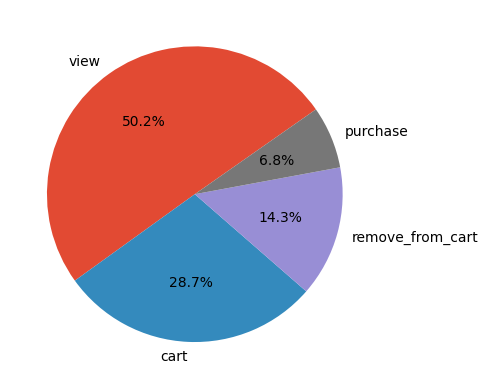

In [29]:
import matplotlib.pyplot as plt
import numpy as np

# Set overall color style
plt.style.use('ggplot')

# Fixing random state for reproducibility
np.random.seed(19680801)

# Pick colors
ncolors = len(plt.rcParams['axes.prop_cycle'])

# Plot the pie graph
plt.pie(sorted_grouped["count"], 
            labels=sorted_grouped["event_type"],    # Set the labels
            autopct='%1.1f%%',                      # Format the percentage
            startangle=35)                          # Set the angle

The pie chart (or bar chart, if preferred for clarity) paints a clear picture of customer activity. It reveals that an overwhelming 50.2% of all customer interactions are 'views'. This tells us that many users are Browse products, but not necessarily taking the next step towards a purchase. Adding to cart makes up 28.7% of actions, while actual purchases account for only 6.8%. This insight is invaluable: it highlights the opportunity to guide more 'viewers' through the sales funnel, perhaps by optimizing product pages, improving recommendations, or streamlining the checkout process.

## The Economic Barometer: Tracking the Business's Pulse

Beyond just understanding customer actions and product popularity, a savvy detective also keeps an eye on the broader economic landscape surrounding the 'crime scene.'

These next three reports are our financial intelligence briefings, showing us the vital signs of the business.

### 'Headcount' Report: Fluctuations in Monthly Customer Numbers

Our first intelligence brief is a 'headcount' report, showing the ebb and flow of active customers each month.

Are we gaining new 'citizens' in our digital city, or are some moving away?

This tells us about the overall reach and growth of our operations.

                         day  unique_customers
0  2022-10-01 00:00:00+00:00              1001
1  2022-10-02 00:00:00+00:00              1045
2  2022-10-03 00:00:00+00:00              1048
3  2022-10-04 00:00:00+00:00               892
4  2022-10-05 00:00:00+00:00               708
..                       ...               ...
95 2023-01-04 00:00:00+00:00               786
96 2023-01-05 00:00:00+00:00               856
97 2023-01-06 00:00:00+00:00               812
98 2023-01-07 00:00:00+00:00               891
99 2023-01-08 00:00:00+00:00               961

[100 rows x 2 columns]


Text(0.5, 1.0, 'Fluctuations in Monthly Customer Numbers')

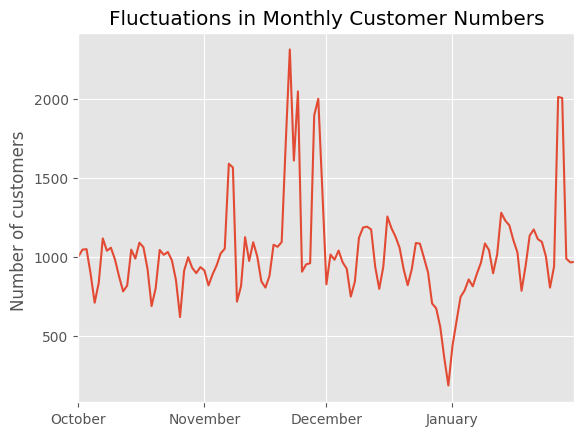

In [30]:
import matplotlib.dates as mdates

# Filter for purchases only
purchases = df[df['event_type'] == 'purchase'].copy()

# Truncate timestamps to date
purchases['day'] = purchases['event_time'].dt.floor('D')

# Count unique users per day
daily_unique_buyers = purchases.groupby('day')['user_id'].nunique().reset_index()

# Sort by date
daily_unique_buyers = daily_unique_buyers.sort_values('day')

# Rename column for clarity (optional)
daily_unique_buyers.rename(columns={'user_id': 'unique_customers'}, inplace=True)

print(daily_unique_buyers.head(100))

plt.plot(daily_unique_buyers["day"], daily_unique_buyers["unique_customers"])
plt.grid(True)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%B'))
plt.xlim(min(daily_unique_buyers["day"]), max(daily_unique_buyers["day"]))
plt.ylabel("Number of customers ")
plt.title("Fluctuations in Monthly Customer Numbers")


**What does this graph show?**: This graph reveals trends in the total number of unique customers engaging with the business over time.

**Why is it important?**:  Growth or decline in customer numbers directly impacts overall business health and future potential. It helps identify periods of acquisition or churn.

### 'Cash Flow' Report: Monthly Sales Volume (in millions)

Next, we have our 'cash flow' report – the most direct evidence of our operational success.

This graph shows the sheer volume of sales revenue flowing through our system each month, measured in millions.

It's the bottom line, telling us if our efforts are translating into tangible results.


     month  total_sales
0  2022-10   1210365.99
1  2022-11   1530362.80
2  2022-12   1077129.97
3  2023-01   1320729.81


/tmp/ipykernel_19167/752242855.py:3: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  purchases['month'] = purchases['event_time'].dt.to_period('M')


Text(0.5, 1.0, 'Monthly Sales Volume (Millions ₳)')

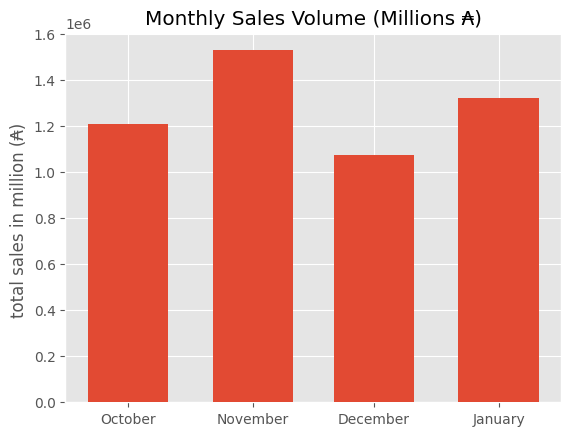

In [31]:
from datetime import timedelta

purchases['month'] = purchases['event_time'].dt.to_period('M')
total_monthly_sales = purchases.groupby('month')['price'].sum().reset_index(name='total_sales')
print(total_monthly_sales)

total_monthly_sales['month'] = total_monthly_sales['month'].dt.to_timestamp()
plt.bar(total_monthly_sales['month'],
        total_monthly_sales['total_sales'],
        width=timedelta(days=20),
        zorder=3)
plt.grid(axis='y', zorder=0)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%B'))
plt.ylabel("total sales in million (₳) ")
plt.title("Monthly Sales Volume (Millions ₳)")

**What does this graph show?**: This graph displays the total monetary value of all purchases made each month.

**Why is it important?**: Provides a high-level overview of the business's revenue performance and helps identify peak selling seasons or areas for improvement.

### 'Spending Habits' Report: Monthly Average Revenue per Customer

Finally, our 'spending habits' report dives deeper into individual customer behavior.

This graph tracks the average revenue generated by each customer per month.

Are our existing 'clients' increasing their average spend, or are we relying solely on new recruits?

This metric is crucial for understanding customer loyalty and the effectiveness of strategies aimed at increasing the value of each interaction.

          user_id                       day  user_revenue_per_day
8638    348697430 2022-10-01 00:00:00+00:00                 47.64
38431   492799459 2022-10-01 00:00:00+00:00                 94.77
69558   555547624 2022-10-01 00:00:00+00:00                 21.45
69556   555546932 2022-10-01 00:00:00+00:00                 33.25
61974   546390147 2022-10-01 00:00:00+00:00                 65.00
...           ...                       ...                   ...
50080   526275149 2023-01-31 00:00:00+00:00                 55.53
122108  604120525 2023-01-31 00:00:00+00:00                 11.91
92034   570616187 2023-01-31 00:00:00+00:00                 56.56
122100  604114754 2023-01-31 00:00:00+00:00                 42.70
125435  608817151 2023-01-31 00:00:00+00:00                  8.64

[125436 rows x 3 columns]
                          day  avg_spend_per_user
0   2022-10-01 00:00:00+00:00           43.428511
1   2022-10-02 00:00:00+00:00           43.773761
2   2022-10-03 00:00:00+00:00  

Text(0.5, 1.0, 'Monthly Average Revenue per Customer')

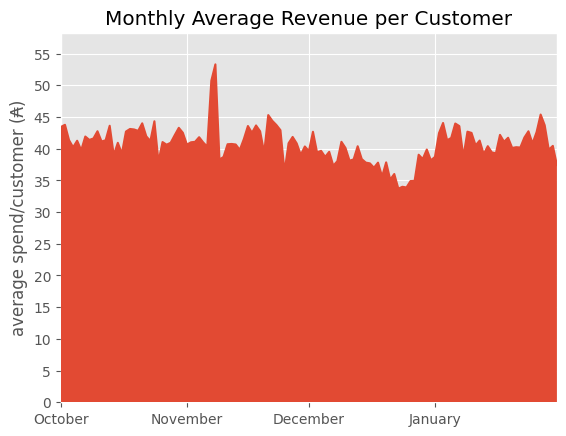

In [32]:
avg_spendings_user_day = purchases.groupby(['user_id', 'day'])['price'].sum().reset_index(name='user_revenue_per_day').sort_values(by='day', ascending=True)
print(avg_spendings_user_day)
daily_avg = avg_spendings_user_day.groupby('day')['user_revenue_per_day'].mean().reset_index(name='avg_spend_per_user')
print(daily_avg)
max_spendings = max(daily_avg['avg_spend_per_user'])

plt.ylim(0, max_spendings+5)
plt.yticks(np.arange(0, max_spendings+5, 5))
plt.plot(daily_avg['day'], daily_avg['avg_spend_per_user'], zorder=3)
plt.fill_between(daily_avg['day'], daily_avg['avg_spend_per_user'], zorder=3)
plt.grid(zorder=0)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%B'))
plt.xlim(min(daily_avg['day']), max(daily_avg['day']))
plt.ylabel("average spend/customer (₳)")
plt.title("Monthly Average Revenue per Customer")

**What does this graph show?**: This graph calculates the average revenue contributed by each active customer monthly.

**Why is it important?**: Indicates the health of customer relationships and the success of upselling/cross-selling efforts. A rising average revenue per customer suggests increasing customer value, even if total customer numbers are flat.

### Connecting the Clues: Our Full Operational Overview

We can use subplotting to combine all the three graphs into a single view, this helps us highlight relationships between different data ponts to get the full picture of operations.

Text(0.5, 1.0, 'Monthly Average Revenue per Customer')

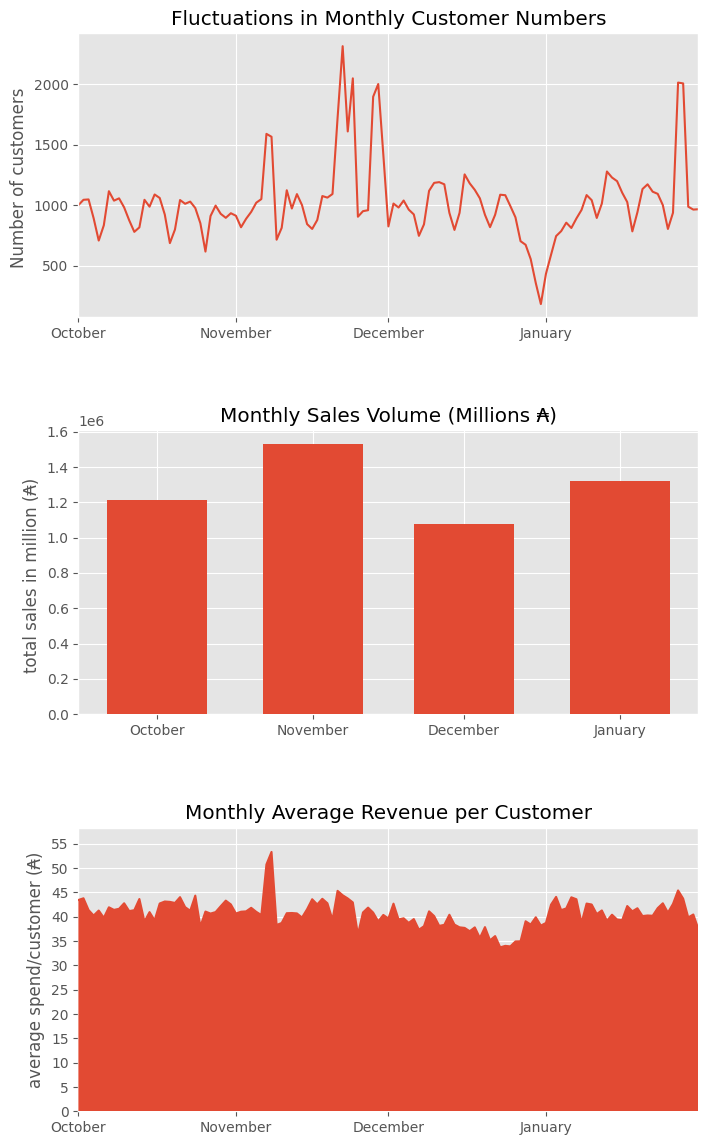

In [33]:
plt.figure(figsize=(8, 14))
plt.subplots_adjust(hspace=0.4)

plt.subplot(3, 1, 1)
plt.plot(daily_unique_buyers["day"], daily_unique_buyers["unique_customers"])
plt.grid(True)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%B'))
plt.xlim(min(daily_unique_buyers["day"]), max(daily_unique_buyers["day"]))
plt.ylabel("Number of customers ")
plt.title("Fluctuations in Monthly Customer Numbers")

plt.subplot(3, 1, 2)
plt.bar(total_monthly_sales['month'],
        total_monthly_sales['total_sales'],
        width=timedelta(days=20),
        zorder=3)
plt.grid(axis='y', zorder=0)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%B'))
plt.ylabel("total sales in million (₳) ")
plt.title("Monthly Sales Volume (Millions ₳)")

plt.subplot(3, 1, 3)
plt.ylim(0, max_spendings+5)
plt.yticks(np.arange(0, max_spendings+5, 5))
plt.plot(daily_avg['day'], daily_avg['avg_spend_per_user'], zorder=3)
plt.fill_between(daily_avg['day'], daily_avg['avg_spend_per_user'], zorder=3)
plt.grid(zorder=0)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%B'))
plt.xlim(min(daily_avg['day']), max(daily_avg['day']))
plt.ylabel("average spend/customer (₳)")
plt.title("Monthly Average Revenue per Customer")

## The Price of Clues: Uncovering Value in Our Data

### Initial Financial Scan: Price Statistics

First, we perform a quick forensic scan of all product prices. This summary gives us a baseline understanding of the financial landscape of our products.

In [34]:
prices = purchases['price']

perc_q1 = np.percentile(prices, 25)
perc_q2 = np.percentile(prices, 50)
perc_q3 = np.percentile(prices, 75)

print("count".ljust(10), len(prices))
print("mean".ljust(10), round(np.mean(prices), 2))
print("std".ljust(10), np.median(prices))
print("min".ljust(10), np.min(prices))
print("25%".ljust(10), perc_q1)
print("50%".ljust(10), perc_q2)
print("75%".ljust(10), perc_q3)
print("max".ljust(10), np.max(prices))

count      1044216
mean       4.92
std        3.0
min        -79.37
25%        1.59
50%        3.0
75%        5.4
max        327.78


### Visualizing the Price Landscape: Distribution of Product Prices

To better understand this distribution, we will lay out the 'evidence' in a box plot. This visual helps us see the typical price range and identify any 'unusual suspects' – prices that fall far outside the common pattern.

Text(0.5, 0, 'price')

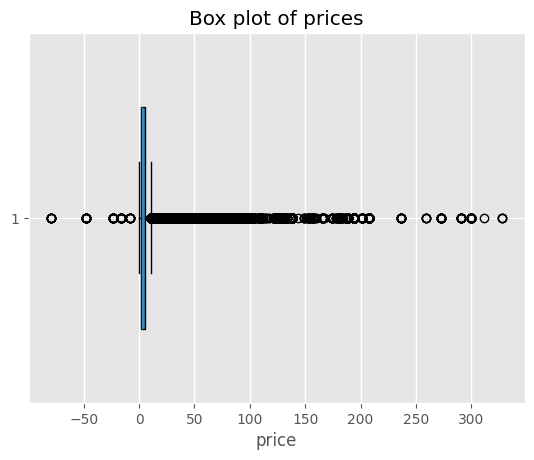

In [35]:
plt.title("Box plot of prices")        
plt.grid(True, axis='x', linewidth=1.0)
plt.boxplot(
    prices, 
    orientation="horizontal", 
    widths=0.6,
    patch_artist=True
    )
plt.xlabel("price")

As you can see in the Distribution of Product Prices (with Outliers) box plot, the bulk of our product prices are concentrated at the lower end, with a few extreme high-priced items appearing as individual dots (the 'outliers'). This confirms our initial suspicion from the statistics: while many products are affordable, there are some premium items that stand apart.

### The Core Market: Interquartile Range (IQR) of Prices

Now, let's focus on the 'main street' of our pricing – the middle 50% of our data, known as the Interquartile Range (IQR). This is where the majority of our typical transactions occur, excluding the extremes.

0.0 11.11 3.8100000000000005


Text(0.5, 0, 'price')

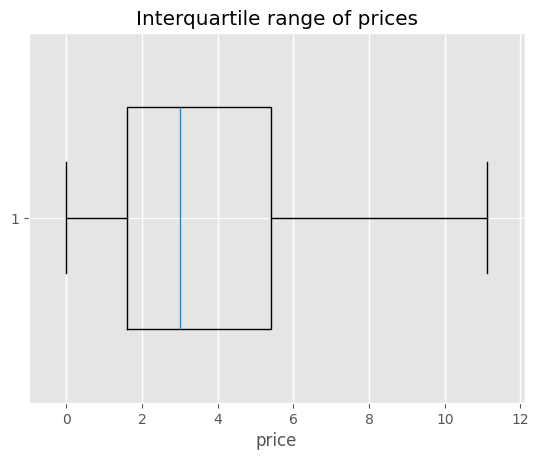

In [36]:
IQR = perc_q3 - perc_q1
lower_whisker = min([p for p in prices if p >= (perc_q1 - 1.5 * IQR)])
upper_whisker = max([p for p in prices if p <= (perc_q3 + 1.5 * IQR)])

print(lower_whisker, upper_whisker, IQR)

plt.title("Interquartile range of prices")
plt.grid(True, axis='x')
plt.xlim(lower_whisker - 1, upper_whisker + 1)

plt.grid(True, axis='x', linewidth=1.0)
plt.boxplot(prices,
            orientation='horizontal', 
            widths=0.6,
            showfliers=False,
            )
plt.xlabel("price")

As you can see in the Distribution of Product Prices (with Outliers) box plot, the bulk of our product prices are concentrated at the lower end.

Our observations tell us that the lower whisker (the minimum typical price) is $0.0, and the upper whisker (the maximum typical price before outliers) is $11.11.

This clearly defines the common range where the vast majority of our products fall.

Any prices beyond $11.11 would be considered 'unusual suspects' or outliers.

Meanwhile the median is at about $3.81 revealing a strong concentration of products at similar, lower price points.

### Individual Spending Habits: Average Basket Prices Per User

Text(0.5, 0, 'average basket price')

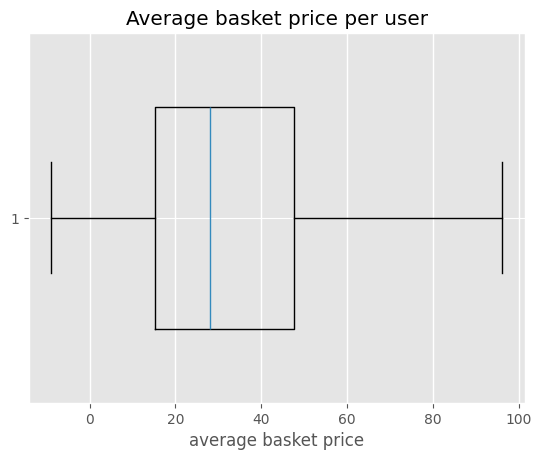

In [37]:
totalBasketPricePerSession = purchases.groupby(['user_id', 'user_session'])['price'].sum().reset_index(name='basket_total')
meanBasketPricePerUser = totalBasketPricePerSession.groupby('user_id')['basket_total'].mean().reset_index(name='basket_avrg')

plt.title("Average basket price per user")
plt.grid(True, axis='x', linewidth=1.0)
plt.boxplot(meanBasketPricePerUser['basket_avrg'],
            orientation='horizontal', 
            widths=0.6,
            showfliers=False,
            )
plt.grid(True, axis='x')
plt.xlabel("average basket price")


The 'average' user's spending per transaction hovers around $29.00.

Most customers' average baskets fall within a 'typical range' from -$8.94 (the lower whisker, a curious detail indicating potential returns or heavy discounts that requires further investigation) up to $95.00 (the upper whisker).

This plot clearly outlines the common ground for customer spending, helping us understand the range of typical user engagement and spot those 'outliers' who diverge from the norm.

### The Grand Unification: All Clues in One View

Now we use subplots to unify the three graphs into one again

Text(0.5, 0, 'average basket price')

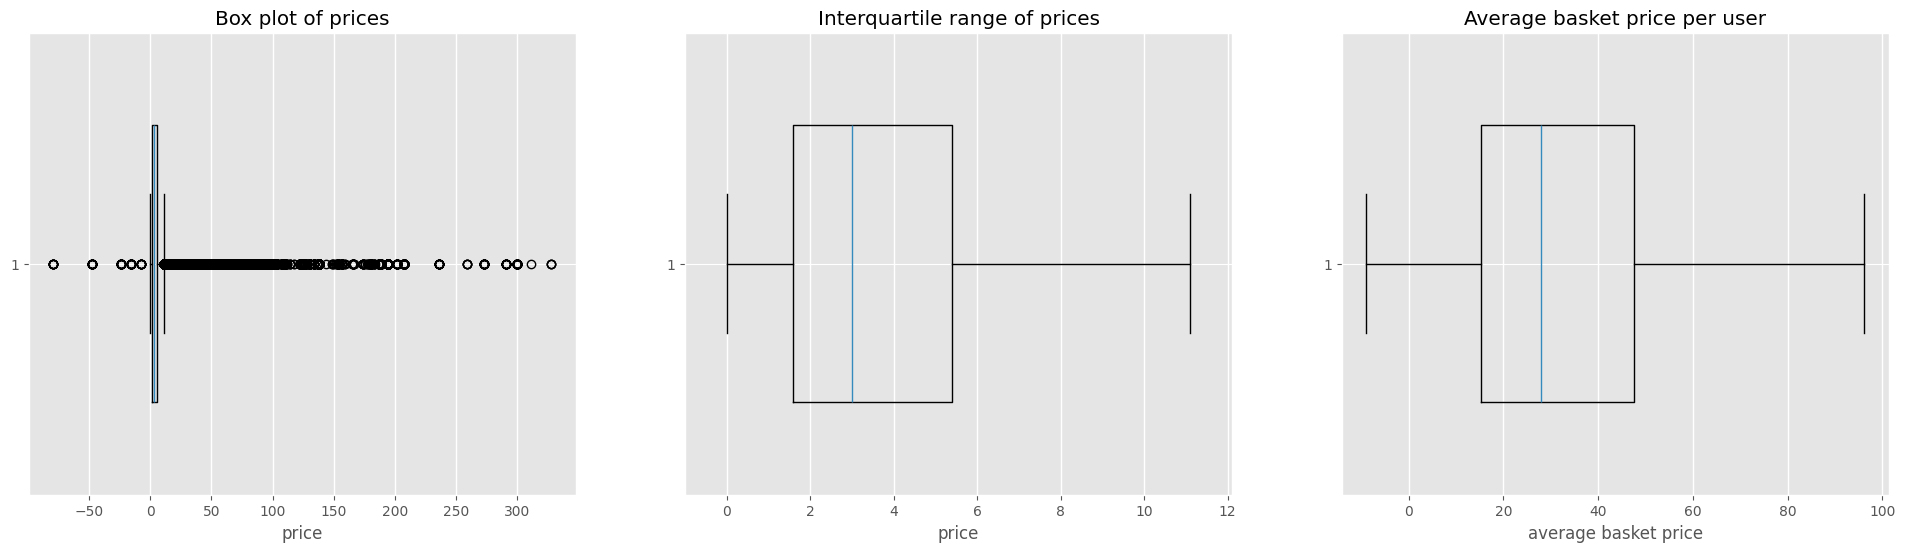

In [38]:
plt.figure(figsize=(24, 6))
plt.subplot(1,3,1)
plt.title("Box plot of prices")        
plt.grid(True, axis='x', linewidth=1.0)
plt.boxplot(
    prices, 
    orientation="horizontal", 
    widths=0.6,
    )
plt.xlabel("price")

plt.subplot(1,3,2)
plt.title("Interquartile range of prices")
plt.grid(True, axis='x')
plt.xlim(lower_whisker - 1, upper_whisker + 1)
plt.grid(True, axis='x', linewidth=1.0)
plt.boxplot(prices,
            orientation='horizontal', 
            widths=0.6,
            showfliers=False,
            )
plt.xlabel("price")

plt.subplot(1,3,3)
plt.title("Average basket price per user")
plt.grid(True, axis='x', linewidth=1.0)
plt.boxplot(meanBasketPricePerUser['basket_avrg'],
            orientation='horizontal', 
            widths=0.6,
            showfliers=False,
            )
plt.grid(True, axis='x')
plt.xlabel("average basket price")

### Profiling Our Suspects: The RFM Dossiers

What is RFM?

To truly understand our customer base, we've created detailed 'dossiers' for each individual using the RFM method:

- **Recency (R)**: How recently did they make a purchase? (A fresh trail vs. a cold case)

- **Frequency (F)**: How often do they buy? (A regular informant vs. a one-time witness)

- **Monetary Value (M)**: How much do they spend? (A high-value target vs. petty larceny)

This table becomes our core intelligence brief, listing each *user_id* alongside their *Recency*, *Frequency*, and *Monetary* scores.

In [39]:
from sklearn.preprocessing import MinMaxScaler

reference_date = purchases['day'].max() + pd.Timedelta(days=1)
rfm = purchases.groupby('user_id').agg(
    Recency=('day', lambda x: (reference_date - x.max()).days),
    Frequency=('user_session', 'nunique'),
    Monetary=('price', 'mean')
).reset_index()
print ("R = (", rfm['Recency'].min(), ", ", rfm['Recency'].max(), ")")
print ("F = (", rfm['Frequency'].min(), ", ", rfm['Frequency'].max(), ")")
print ("M = (", rfm['Monetary'].min(), ", ", rfm['Monetary'].max(), ")")
print(rfm)

R = ( 1 ,  123 )
F = ( 1 ,  103 )
M = ( -1.44 ,  299.81 )
         user_id  Recency  Frequency    Monetary
0        9794320       68          1    3.170000
1       10079204       87          1   12.905000
2       10280338       20          3    4.290000
3       12055855       43          1    4.135000
4       12936739       15          1   14.945000
...          ...      ...        ...         ...
92647  608807757        1          1   13.603333
92648  608809325        1          1  207.940000
92649  608809552        1          1    3.952500
92650  608812129        1          1    2.956250
92651  608817151        1          1    2.880000

[92652 rows x 4 columns]


To ensure all these 'clues' are treated equally in our analysis, we then **standardize these columns into values from 0.0 to 1.0**.

This is like normalizing the 'weight' of each piece of evidence, so a high monetary value doesn't unfairly overshadow a high frequency, ensuring a fair assessment across all metrics.

In [40]:
rfm[['Recency', 'Frequency', 'Monetary']] = MinMaxScaler().fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])
print(rfm)

         user_id   Recency  Frequency  Monetary
0        9794320  0.549180   0.000000  0.015303
1       10079204  0.704918   0.000000  0.047618
2       10280338  0.155738   0.019608  0.019021
3       12055855  0.344262   0.000000  0.018506
4       12936739  0.114754   0.000000  0.054390
...          ...       ...        ...       ...
92647  608807757  0.000000   0.000000  0.049936
92648  608809325  0.000000   0.000000  0.695037
92649  608809552  0.000000   0.000000  0.017900
92650  608812129  0.000000   0.000000  0.014593
92651  608817151  0.000000   0.000000  0.014340

[92652 rows x 4 columns]


## Unmasking the Groups: Clustering Our Customer Base

With our standardized dossiers, we can now look for natural groupings among our customers – like identifying different 'gangs' or 'circles' within our digital city.

We use a technique called **K-Means Clustering** for this. Think of it as a master detective's algorithm that groups similar 'suspects' together based on their shared traits.
To find the optimal number of groups, we employ the **Elbow Method**. This method plots the **WCSS (Within-Cluster Sum of Squares)** – essentially, how 'tight' or similar the members of each group are – against a varying number of *k (the number of clusters)*. The 'elbow' point on the graph indicates where adding more clusters no longer significantly improves the tightness of the groups, showing us the most efficient number of distinct customer segments.

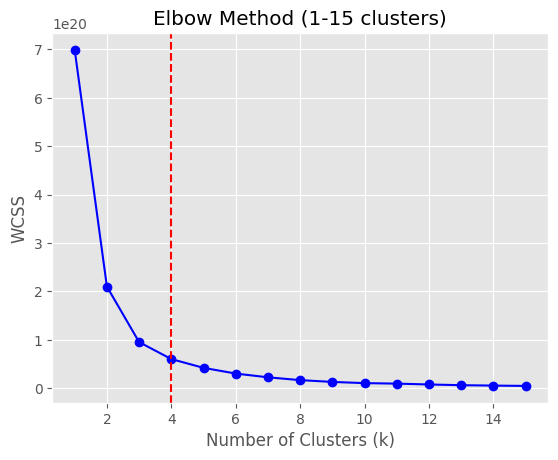

In [41]:
from sklearn.cluster import KMeans

wcss = [] # Within-cluster sum of squares
for k in range (1,16):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(rfm)
    wcss.append(kmeans.inertia_)

# Plotting
plt.plot(range(1, 16), wcss, 'bo-')
plt.axvline(x=4, linestyle='--', color='red', label='Optimal k')
plt.title('Elbow Method (1-15 clusters)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.grid(True)

From our Elbow Method analysis (displayed for 1-15 clusters), we've determined that **4 distinct clusters** provide the clearest and most meaningful divisions among our customer base.

## The Customer Archetypes: Naming Our Segments

Now that we've identified these four distinct groups, it's time to give them names that reflect their typical 'user behaviors':

- **Champions**: Our most valuable and loyal customers, consistent and high-spending.
- **Loyal Customers**: Frequent buyers, though perhaps not always the highest spenders.
- **At Risk**: Customers whose activity has recently declined, potentially on the verge of churn.
- **New Customers**: Recent additions, whose future behavior is still being assessed.

In [42]:
cluster_labels = {
    0: "Champions",
    1: "Loyal Customers",
    2: "At Risk",
    3: "New Customers"
}

## The Grand Reveal: Visualizing Customer Segments

To truly see how these different customer profiles are positioned relative to each other, we needed a map. Our RFM data, even standardized, is multi-dimensional, making direct visualization difficult.

This is where **PCA (Principal Component Analysis)** comes in. Think of PCA as a brilliant forensic artist who can take a complex, detailed description of a 'suspect' (our customer's RFM scores) and simplify it down to just the most distinguishing features (like reducing a full facial profile to just two key angles). We use it to **scale the data down to 2 dimensions**, making it easily plottable without losing the essence of the distinctions between customers.

Finally, we display this data on a **cluster map**. Each point on this map represents a customer, and their assigned 'cluster label' (the color) instantly reveals which segment they belong to. It's a powerful visual, allowing us to see at a glance where our 'Champions' gather, where the 'At Risk' customers might be clustered, and the general landscape of our customer city. This map is the culminating piece of evidence, clarifying the relationships between our diverse customer archetypes.

[[-0.3525227  -0.4632884 ]
 [-0.88439827  0.13205427]
 [ 1.76773053  0.08490833]
 ...
 [ 0.91389469  0.04117201]
 [ 0.93117863 -0.03270935]
 [ 0.93250149 -0.03836401]]
        Recency  Frequency  Monetary
0      0.549180   0.000000  0.015303
1      0.704918   0.000000  0.047618
2      0.155738   0.019608  0.019021
3      0.344262   0.000000  0.018506
4      0.114754   0.000000  0.054390
...         ...        ...       ...
92647  0.000000   0.000000  0.049936
92648  0.000000   0.000000  0.695037
92649  0.000000   0.000000  0.017900
92650  0.000000   0.000000  0.014593
92651  0.000000   0.000000  0.014340

[92652 rows x 3 columns]


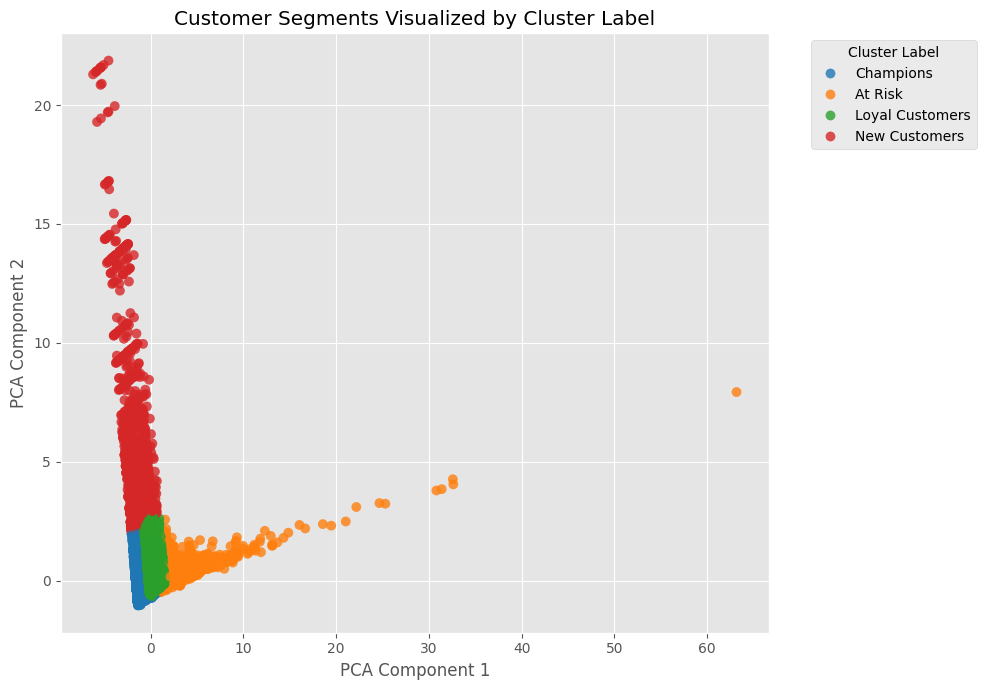

In [43]:
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# drop user_id before clustering
clean_rfm = rfm.drop(columns=['user_id'])
x_scaled = StandardScaler().fit_transform(clean_rfm)
#print(clean_rfm)
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(x_scaled)

rfm_mod = rfm.copy()
rfm_mod['cluster'] = clusters
rfm_mod['cluster_label'] = rfm_mod['cluster'].map(cluster_labels)

# Reduce scaled data to 2D for visualization
pca = PCA(n_components=2)
rfm_2d = pca.fit_transform(x_scaled)
print(rfm_2d)

# Add PCA results to the RFM data frame
rfm_mod['pca1'] = rfm_2d[:, 0]
rfm_mod['pca2'] = rfm_2d[:, 1]


print(clean_rfm)
plt.figure(figsize=(10, 7))
sns.scatterplot(data=rfm_mod,
                x='pca1', y='pca2',
                hue='cluster_label',
                edgecolor='None',
                palette='tab10', s=50, alpha=0.8)
plt.title("Customer Segments Visualized by Cluster Label")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title='Cluster Label', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()